In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
df = pd.read_csv('C:/Users/barra/ML Algoritm/dataset/train.csv', encoding='utf-8')
df_test = pd.read_csv('C:/Users/barra/ML Algoritm/dataset/test.csv', encoding='utf-8')

In [4]:
df.columns

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

In [5]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,2886.89568,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,4999.50000,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,9999.00000,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [6]:
X = df[['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history']]
y = df['mean_exam_points']

X_test = df_test[['age', 'years_of_experience', 'lesson_price', 'qualification',
                  'physics', 'chemistry', 'biology', 'english', 'geography', 'history']].values

In [7]:
X = reduce_mem_usage(X)


Memory usage of dataframe is 0.76 MB
Memory usage after optimization is: 0.38 MB
Decreased by 50.0%


C:\Users\barra\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


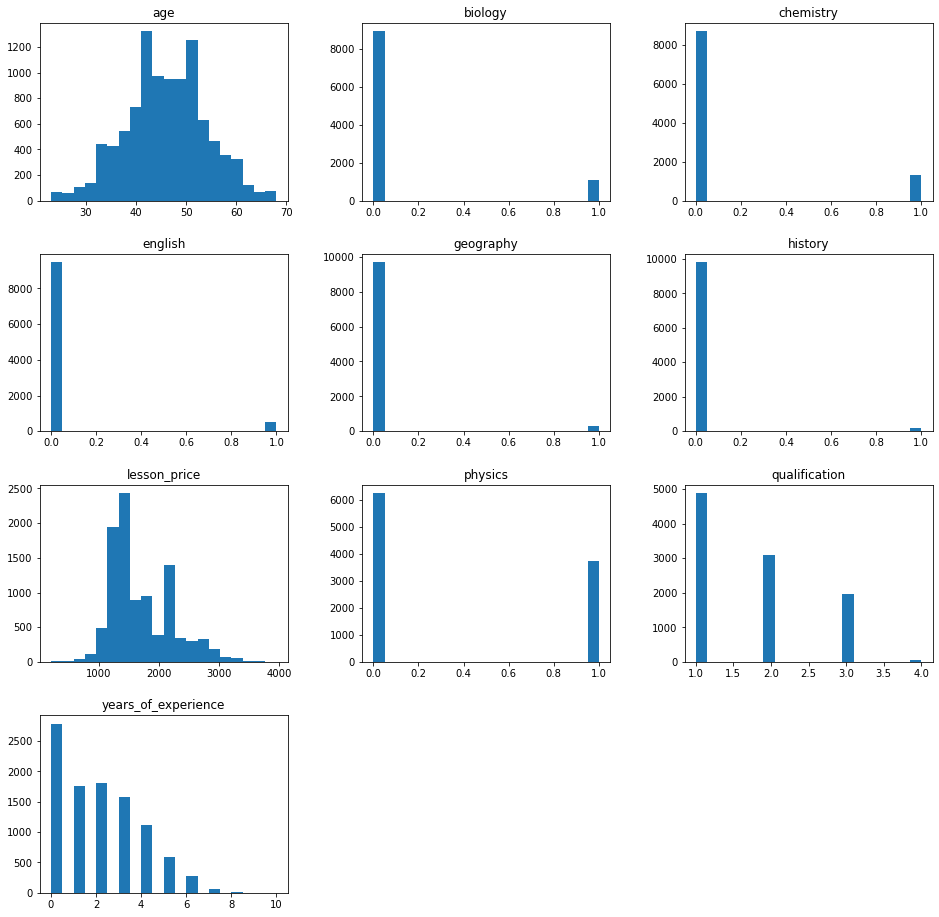

In [8]:
X.hist(figsize=(16,16), bins=20, grid=False);

In [9]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [10]:
class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        #  найдем значение как среднее по выборке   
        prediction = np.mean(self.labels)
        return prediction

In [11]:
class Tree:

    def __init__(self, max_depth=50):
        self.max_depth = max_depth
        self.tree = None

  # Расчёт дисперсии значений
    def dispersion(self, labels):
        return np.std(labels)

  # Расчет качества

    def quality(self, left_labels, right_labels, current_dispersion):

    # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return current_dispersion - p * self.dispersion(left_labels) - (1 - p) * self.dispersion(right_labels)

    # Разбиение датасета в узле

    def split(self, data, labels, index, t):

        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)
            
        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]
        
        return true_data, false_data, true_labels, false_labels

    # Нахождение наилучшего разбиения

    def find_best_split(self, data, labels):
    
    #  обозначим минимальное количество объектов в узле
        min_leaf = 5

        current_dispersion = self.dispersion(labels)

        best_quality = 0
        best_t = None
        best_index = None
        
        n_features = data.shape[1]
        
        for index in range(n_features):
          # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])
          
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_leaf or len(false_data) < min_leaf:
                    continue
                
                current_quality = self.quality(true_labels, false_labels, current_dispersion)
                
                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index

    # Построение дерева с помощью рекурсивной функции

    def build_tree(self, data, labels, tree_depth, max_depth):

        quality, t, index = self.find_best_split(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)

        # Базовый случай (2) - прекращаем рекурсию, когда достигнута максимальная глубина дерева
        if tree_depth >= max_depth:
            return Leaf(data, labels)

        # Увеличиваем глубину дерева на 1
        tree_depth += 1

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels, tree_depth, max_depth)
        false_branch = self.build_tree(false_data, false_labels, tree_depth, max_depth)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return Node(index, t, true_branch, false_branch)

    def predict_object(self, obj, node):

    #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)

    def predict(self, data):
  
        val = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            val.append(prediction)
        return val

    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels, 0, self.max_depth)
        return self

In [12]:
class GradientBoosting:
  
    def __init__(self, n_trees, max_depth, coefs, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.coefs = coefs
        self.eta = eta
        self.trees = []

    def bias(self, y, z):
        return (y - z)

    def fit(self, X_train, y_train):
      
      # Деревья будем записывать в список
        trees = []
      
        for i in range(self.n_trees):
            tree = Tree(max_depth=self.max_depth)

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)
            else:
                # Получим ответы на текущей композиции
                target = self.predict(X_train)
                
                # алгоритмы начиная со второго обучаем на сдвиг
                bias = self.bias(y_train, target)
                tree.fit(X_train, bias)

            self.trees.append(tree)
          
        return self

    def predict(self, X):
      # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
      # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
        return np.array([sum([self.eta* coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])

In [13]:
def r_2(y_pred, y_true):
    numerator = ((y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
    denominator = ((y_true - np.average(y_true)) ** 2).sum(axis=0,
                                                            dtype=np.float64)
    return 1 - (numerator / denominator)

In [14]:
X = X.values
y = y.values

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                    test_size = 0.3,
                                                                    random_state = 1)

In [16]:
# Число деревьев в ансамбле
n_trees = 15

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 0.7

In [17]:
gb = GradientBoosting(n_trees, max_depth, coefs, eta)
gb.fit(train_data, train_labels)
train_answers = gb.predict(train_data)
test_answers = gb.predict(test_data)

In [18]:
r_2(train_answers, train_labels)

0.6851897420755408

In [19]:
r_2(test_answers, test_labels)

0.6429552498149755

In [20]:
test_pred = gb.predict(X_test)

In [21]:
submissions = pd.concat([df_test['Id'], pd.Series(test_pred)], axis=1)
submissions = submissions.rename(columns={0: 'mean_exam_points'})

In [22]:
submissions.to_csv('Result.csv',index=None)